# NLP Foundations: League of Legends Wikipedia Analysis

# 1. Introduction

This notebook applies foundational NLP techniques to analyze Wikipedia text related to League of Legends. We cover key tasks like data loading, text preprocessing, and fundamental NLP analysis using Python.

### Overview
- **Objective**: Perform basic NLP operations on Wikipedia data.
- **Steps**: Data loading, text cleaning, word analysis, and simple visualizations.

### Table of Contents

1. Introduction
* Overview of NLP Techniques
* Objective of the Notebook
* Dependencies and Libraries
2. Data Collection and Preprocessing
* 2.1 Loading Text Data from Wikipedia
* 2.2 Text Extraction and Cleaning
* 2.3 Tokenization
3. Lexical Analysis
* 3.1 Lexical Richness Calculation
* 3.2 Word Frequency Analysis
* 3.3 Distribution of Lexical Content
4. Frequency Distributions
* 4.1 Building Frequency Distributions
* 4.2 Filtering for Informative Words
* 4.3 Visualizing Word Frequencies
5. N-Grams Analysis
* 5.1 Bi-Grams
* 5.2 Tri-Grams
* 5.3 Frequency Filtering for N-Grams
6. Collocations and Pointwise Mutual Information (PMI)
* 6.1 Introduction to Collocations
* 6.2 Calculating Pointwise Mutual Information (PMI)
* 6.3 Visualizing Collocations with PMI
7. Built-in Association Measures in NLTK
* 7.1 Applying Bigram Association Measures
* 7.2 Filtering Bigram Results
8. Lexicons and Resources
* 8.1 Stopwords and Their Distribution
* 8.2 Enriched Lexicons with Language Translation (Swadesh)
* 8.3 WordNet Lexical Database
9. Exploring WordNet
* 9.1 Synonyms and Synsets
* 9.2 Semantic Relationships
10. Conclusion
* Summary of Techniques Covered
* Potential Next Steps in NLP Analysis

### Dependencies and Libraries

In [1]:
# Libraries and Data Acquisition
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords, swadesh, wordnet as wn
from urllib import request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import re

In [2]:
# Download necessary nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('swadesh')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package swadesh to /root/nltk_data...
[nltk_data]   Unzipping corpora/swadesh.zip.


True

# 2. Data Collection and Preprocessing

In [3]:
# Retrieve and parse Wikipedia text
url = 'https://en.wikipedia.org/wiki/League_of_Legends'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
text = soup.get_text()

In [4]:
# Tokenization and Cleaning
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text.lower())

In [5]:
# Overview of Tokens
print(tokens[:10])  # Display first 10 tokens

['league', 'of', 'legends', 'wikipedia', 'jump', 'to', 'content', 'main', 'menu', 'main']


In [6]:
text = nltk.Text(tokens)
text.collocations()

2020 retrieved; retrieved january; riot games; retrieved december;
retrieved september; 2021 retrieved; polygon archived; teamfight
tactics; wolf jacob; lee julia; webster andrew; world championship;
guide espn; goslin austen; warcraft iii; mid season; animated series;
rift herald; verge archived; washington post


# 3. Lexical Analysis

## Lexical Richness Measure in a Text:

$$ L_R = \frac{\text{total unique words}}{\text{total words}} = \frac{\text{vocabulary length}}{\text{text length}}$$

In [7]:
vocabulary = sorted(set(text))
vocabulary[1000:1050]

['forge',
 'form',
 'formal',
 'formatnum',
 'formed',
 'former',
 'formosa',
 'forms',
 'fortiche',
 'fortune',
 'found',
 'foundation',
 'founded',
 'founders',
 'fountains',
 'four',
 'fox',
 'franchise',
 'franchised',
 'franchises',
 'franchising',
 'free',
 'frequently',
 'friedman',
 'from',
 'frustrating',
 'full',
 'fun',
 'functional',
 'functionality',
 'further',
 'future',
 'g',
 'gain',
 'galaxy',
 'gamasutra',
 'gambit',
 'gambling',
 'game',
 'gameleague',
 'gameplay',
 'gamer',
 'gamerevolution',
 'gamerevolutionb',
 'gamers',
 'games',
 'gamesbafta',
 'gamesdirector',
 'gamesesports',
 'gamesfree']

In [8]:
# Lexical Richness Calculation
def lexical_richness(text_tokens):
    return len(set(text_tokens)) / len(text_tokens)

def word_percentage(word, text_tokens):
    return 100 * text_tokens.count(word) / len(text_tokens)

In [9]:
# Example usage
print("Lexical richness:", lexical_richness(tokens))
print("Percentage of 'champion':", word_percentage('champion', tokens))

Lexical richness: 0.22099733011799155
Percentage of 'champion': 0.17225045215743692


# 4. Frequency Distributions

In [10]:
# Frequency Distribution
fdist = nltk.FreqDist(tokens)
print(fdist.most_common(10))  # Show top 10 most common words

[('the', 570), ('of', 392), ('league', 218), ('2020', 214), ('on', 207), ('from', 204), ('legends', 202), ('a', 195), ('and', 182), ('in', 177)]


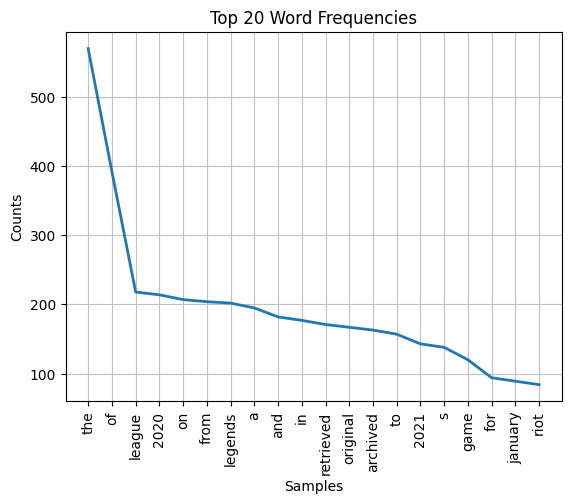

<Axes: title={'center': 'Top 20 Word Frequencies'}, xlabel='Samples', ylabel='Counts'>

In [11]:
# Visualize Word Frequency
fdist.plot(20, title="Top 20 Word Frequencies")

## Fine-grained Content Filtering Distributions
As we saw in the previous section, the most frequent tokens in a text aren't necessarily the ones that provide the most insight into its content.
Therefore, it's beneficial to filter and build frequency distributions that exclude punctuation or special characters.


In [13]:
# Filter words by minimum length (e.g., longer than 5 characters)
min_word_length = 5
long_words = [word for word in text if len(word) > min_word_length]
filtered_vocabulary = sorted(set(long_words))
print("Sample of filtered vocabulary:", filtered_vocabulary[:20])

Sample of filtered vocabulary: ['1255632278', '147191716', '1555412015590063', '198591367', '2009os', '2018all', '2019developer', '2021articles', '2021commons', '2024all', '3152771', '3152804', '3415229', 'abilities', 'abusive', 'accessibility', 'accessible', 'accessories', 'acclaim', 'accolades']


In [15]:
# Build a list of tuples based on pre-calculated counts from FreqDist
fdist = nltk.FreqDist(long_words)
filtered_fdist = [(word, fdist[word]) for word in filtered_vocabulary]

In [16]:
# Convert the tuple list to a Numpy array for easy sorting
dtype = [('word', 'U20'), ('frequency', int)]
filtered_fdist_np = np.array(filtered_fdist, dtype=dtype)

In [17]:
# Sort the array by frequency
sorted_fdist = np.sort(filtered_fdist_np, order='frequency')
top_frequent_words = sorted_fdist[-20:]  # Get top 20 most frequent words
print("Top frequent words:", top_frequent_words)

Top frequent words: [('release',  17) ('champion',  20) ('polygon',  21) ('august',  22)
 ('player',  23) ('series',  23) ('champions',  24) ('esports',  29)
 ('review',  32) ('players',  45) ('december',  65) ('october',  65)
 ('november',  71) ('september',  72) ('january',  89) ('archived', 163)
 ('original', 167) ('retrieved', 171) ('legends', 202) ('league', 218)]


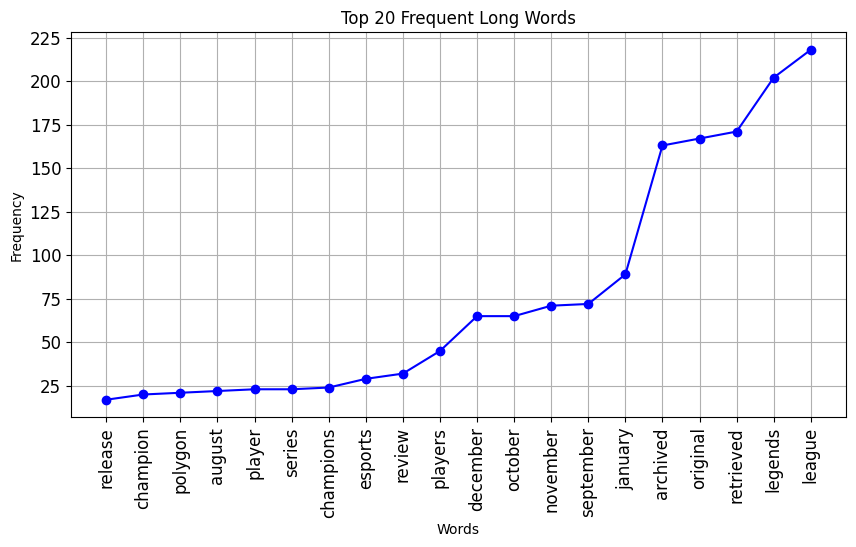

In [18]:
# Customized Bar Plot with Matplotlib for Top Frequent Words
top_words = 20
x = np.arange(len(top_frequent_words))
y = [freq[1] for freq in top_frequent_words]

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xticks(x, [str(freq[0]) for freq in top_frequent_words], rotation='vertical')
plt.tick_params(labelsize='large')
plt.grid(True)
plt.title("Top 20 Frequent Long Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# 5. N-Grams Analysis

In [20]:
# Bigrams and Trigrams
from nltk.util import ngrams
bigrams = list(nltk.bigrams(tokens))
trigrams = list(ngrams(tokens, 3))
print("Bigrams",bigrams)
print("Trigrams",trigrams)

Bigrams [('league', 'of'), ('of', 'legends'), ('legends', 'wikipedia'), ('wikipedia', 'jump'), ('jump', 'to'), ('to', 'content'), ('content', 'main'), ('main', 'menu'), ('menu', 'main'), ('main', 'menu'), ('menu', 'move'), ('move', 'to'), ('to', 'sidebar'), ('sidebar', 'hide'), ('hide', 'navigation'), ('navigation', 'main'), ('main', 'pagecontentscurrent'), ('pagecontentscurrent', 'eventsrandom'), ('eventsrandom', 'articleabout'), ('articleabout', 'wikipediacontact'), ('wikipediacontact', 'us'), ('us', 'contribute'), ('contribute', 'helplearn'), ('helplearn', 'to'), ('to', 'editcommunity'), ('editcommunity', 'portalrecent'), ('portalrecent', 'changesupload'), ('changesupload', 'file'), ('file', 'search'), ('search', 'search'), ('search', 'appearance'), ('appearance', 'donate'), ('donate', 'create'), ('create', 'account'), ('account', 'log'), ('log', 'in'), ('in', 'personal'), ('personal', 'tools'), ('tools', 'donate'), ('donate', 'create'), ('create', 'account'), ('account', 'log'), ('

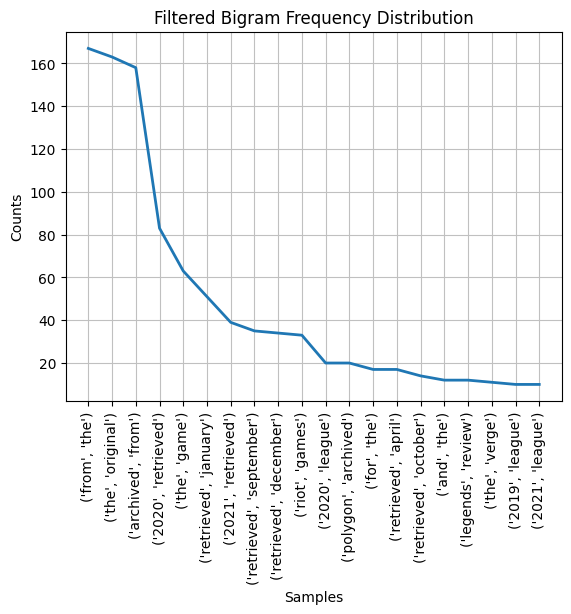

<Axes: title={'center': 'Filtered Bigram Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [21]:
# Filtered Bigrams (length-based)
filtered_bigrams = [bigram for bigram in bigrams if len(bigram[0]) > 2 and len(bigram[1]) > 2]
filtered_bigram_dist = nltk.FreqDist(filtered_bigrams)
filtered_bigram_dist.plot(20, title="Filtered Bigram Frequency Distribution")

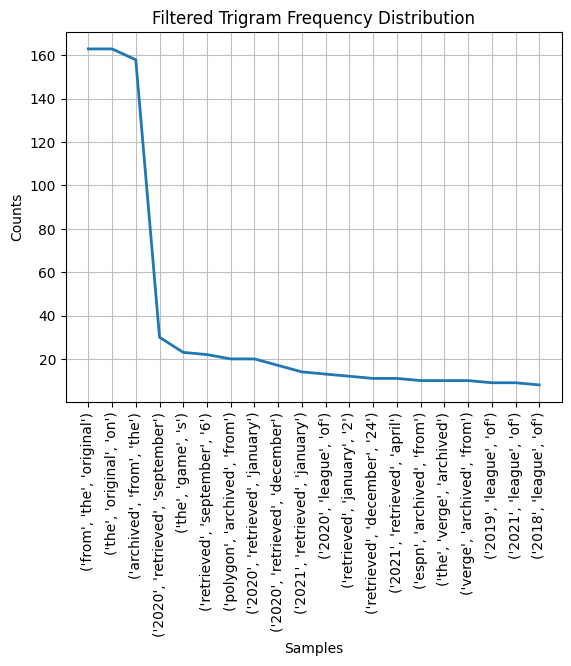

<Axes: title={'center': 'Filtered Trigram Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [22]:
# Filtered Bigrams (length-based)
filtered_trigrams = [trigram for trigram in trigrams if len(trigram[0]) > 2 and len(trigram[1]) > 2]
filtered_trigram_dist = nltk.FreqDist(filtered_trigrams)
filtered_trigram_dist.plot(20, title="Filtered Trigram Frequency Distribution")

# 6. Collocations and Pointwise Mutual Information (PMI)

# Pointwise Mutual Information (PMI)

A metric based on information theory to identify **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [25]:
# PMI Calculation for Collocations
def calculate_pmi(bigram_freq, word_freq, total_words):
    p_w1_w2 = bigram_freq / total_words
    p_w1 = word_freq[0] / total_words
    p_w2 = word_freq[1] / total_words
    # Check to avoid division by zero
    if p_w1 == 0 or p_w2 == 0:
        return None  # Skip PMI calculation for this bigram
    return np.log2(p_w1_w2 / (p_w1 * p_w2))

In [26]:
# Create DataFrame of Bigram PMI
bigram_pmi_data = []
for bigram, freq in filtered_bigram_dist.items():
    word_freqs = [fdist[bigram[0]], fdist[bigram[1]]]
    pmi = calculate_pmi(freq, word_freqs, len(tokens))
    if pmi is not None:  # Only add to data if PMI was successfully calculated
        bigram_pmi_data.append((bigram, freq, pmi))


In [27]:
# Convert to DataFrame and display top results
bigram_df = pd.DataFrame(bigram_pmi_data, columns=['Bigram', 'Frequency', 'PMI'])
bigram_df = bigram_df.sort_values(by='PMI', ascending=False)
print(bigram_df.head(10))

                        Bigram  Frequency        PMI
500      (sparked, widespread)          1  13.503205
876           (deadly, pirate)          1  13.503205
248       (includes, hundreds)          1  13.503205
249      (producers, creating)          1  13.503205
251  (periodically, overhauls)          1  13.503205
267        (machine, mechanic)          1  13.503205
294        (warhammer, writer)          1  13.503205
305     (lovecraftian, horror)          1  13.503205
617      (metagame, exploring)          1  13.503205
878           (bounty, hunter)          1  13.503205


In [28]:
# Plot PMI Distribution
fig = px.scatter(bigram_df, x='PMI', y='Frequency', hover_name='Bigram', title="PMI of Bigrams")
fig.show()

# 7. Built-in Association Measures in NLTK

In [29]:
# Stopword Analysis
stop_words = stopwords.words('english')
content_words = [w for w in tokens if w not in stop_words]

In [30]:
# Proportion of Non-Stopwords
print("Percentage of content words:", len(content_words) / len(tokens))

Percentage of content words: 0.7107053656015847


# 8. Lexicons and Resources

In [33]:
# Available Languages
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [34]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [35]:
fr2es = swadesh.entries(['fr', 'es'])
print(fr2es)

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá'), ('qui', 'quien'), ('quoi', 'que'), ('où', 'donde'), ('quand', 'cuando'), ('comment', 'como'), ('ne...pas', 'no'), ('tout', 'todo'), ('plusieurs', 'muchos'), ('quelques', 'algunos, unos'), ('peu', 'poco'), ('autre', 'otro'), ('un', 'uno'), ('deux', 'dos'), ('trois', 'tres'), ('quatre', 'cuatro'), ('cinq', 'cinco'), ('grand', 'grande'), ('long', 'largo'), ('large', 'ancho'), ('épais', 'gordo'), ('lourd', 'pesado'), ('petit', 'pequeño'), ('court', 'corto'), ('étroit', 'estrecho, angosto'), ('mince', 'delgado, flaco'), ('femme', 'mujer'), ('homme', 'hombre'), ('homme', 'hombre'), ('enfant', 'niño'), ('femme, épouse', 'esposa, mujer'), ('mari, époux', 'esposo, marido'), ('mère', 'madre'), ('père', 'padre'), ('animal', 'animal'), ('poisson', 'pez, pescado'), ('ois

In [31]:
# Swadesh Lexicon Translation (French to Spanish)
fr_to_es = dict(swadesh.entries(['fr', 'es']))
print("French 'chien' to Spanish:", fr_to_es['chien'])

French 'chien' to Spanish: perro


# 9. Exploring WordNet

In [36]:
# NLTK and WordNet imports for semantic analysis
import nltk
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

In [37]:
# Ensure necessary resources are downloaded
nltk.download('omw')
nltk.download('wordnet')

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
# Explore synonyms (synsets) for the term "champion" in League of Legends context
synsets = wn.synsets('champion', lang='eng')
synsets

[Synset('champion.n.01'),
 Synset('champion.n.02'),
 Synset('supporter.n.01'),
 Synset('ace.n.03'),
 Synset('champion.v.01'),
 Synset('champion.s.01')]

In [39]:
# Display definitions and synonyms for each synset found
for syn in synsets:
    print(syn.name(), ': ', syn.definition())
    for name in syn.lemma_names():
        print(' * ', name)

champion.n.01 :  someone who has won first place in a competition
 *  champion
 *  champ
 *  title-holder
champion.n.02 :  someone who fights for a cause
 *  champion
 *  fighter
 *  hero
 *  paladin
supporter.n.01 :  a person who backs a politician or a team etc.
 *  supporter
 *  protagonist
 *  champion
 *  admirer
 *  booster
 *  friend
ace.n.03 :  someone who is dazzlingly skilled in any field
 *  ace
 *  adept
 *  champion
 *  sensation
 *  maven
 *  mavin
 *  virtuoso
 *  genius
 *  hotshot
 *  star
 *  superstar
 *  whiz
 *  whizz
 *  wizard
 *  wiz
champion.v.01 :  protect or fight for as a champion
 *  champion
 *  defend
champion.s.01 :  holding first place in a contest
 *  champion
 *  prizewinning


In [40]:
# Function to generate a directed graph for a synset's relationships
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}

    def recurse(s):
        if s not in seen:
            seen.add(s)
            labels[s.name()] = s.name().split('.')[0]
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph, labels

In [41]:
# Function to draw the graph with labels
def draw_text_graph(G, labels):
    plt.figure(figsize=(18, 12))
    pos = nx.planar_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="blue", node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=14, labels=labels)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])
    plt.show()

champion.n.01


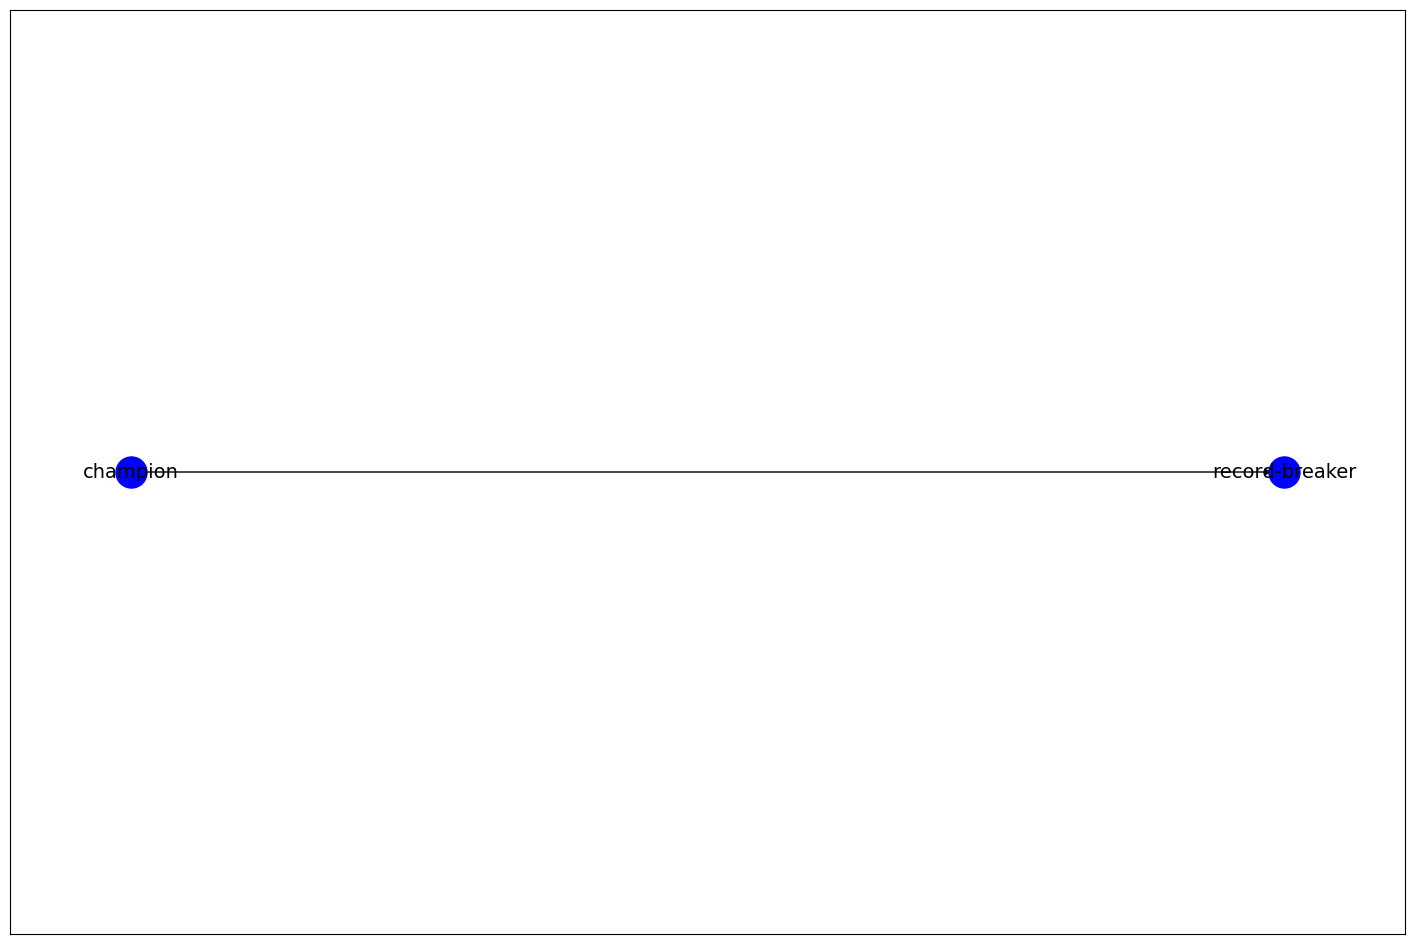

In [42]:
# Exploring specific relationships for "champion" synset in WordNet
# Hyponyms: more specific concepts related to the synset
print(synsets[0].name())
G, labels = closure_graph(synsets[0], fn=lambda s: s.hyponyms())
draw_text_graph(G, labels)

champion.n.01


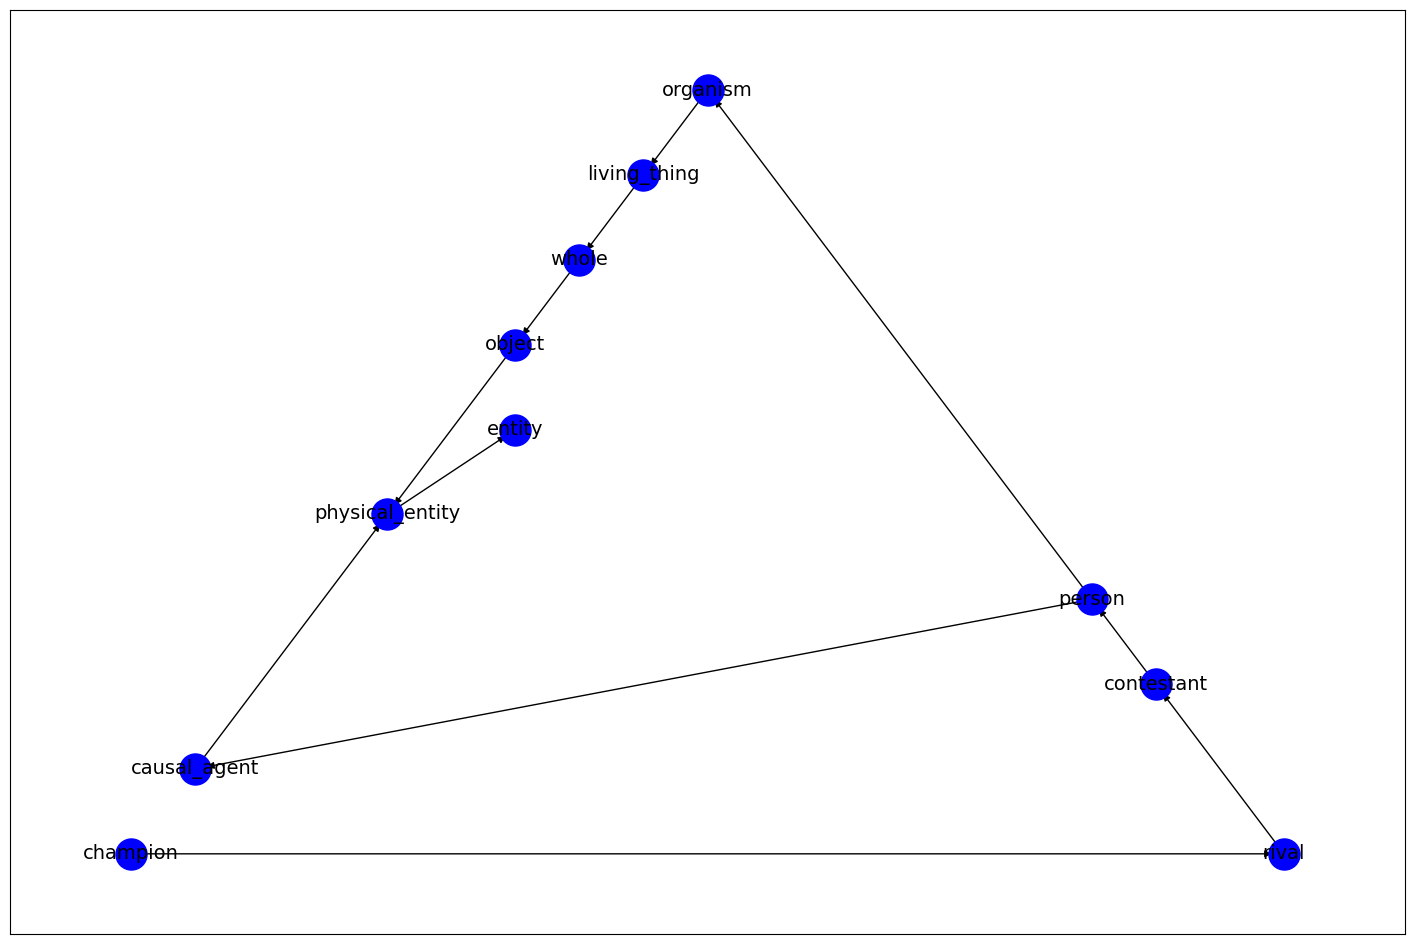

In [43]:
# Hypernyms: more general concepts related to the synset
print(synsets[0].name())
G, labels = closure_graph(synsets[0], fn=lambda s: s.hypernyms())
draw_text_graph(G, labels)

In [44]:
# Semantic similarity comparisons between terms
def show_synsets(word):
    synsets = wn.synsets(word, lang='eng')
    for syn in synsets:
        print(syn.name(), ': ', syn.definition())
        for name in syn.lemma_names():
            print(' * ', name)
    return synsets

In [45]:
# Define and explore League of Legends terms
champion_synsets = show_synsets('champion')
warrior_synsets = show_synsets('warrior')
creature_synsets = show_synsets('creature')

champion.n.01 :  someone who has won first place in a competition
 *  champion
 *  champ
 *  title-holder
champion.n.02 :  someone who fights for a cause
 *  champion
 *  fighter
 *  hero
 *  paladin
supporter.n.01 :  a person who backs a politician or a team etc.
 *  supporter
 *  protagonist
 *  champion
 *  admirer
 *  booster
 *  friend
ace.n.03 :  someone who is dazzlingly skilled in any field
 *  ace
 *  adept
 *  champion
 *  sensation
 *  maven
 *  mavin
 *  virtuoso
 *  genius
 *  hotshot
 *  star
 *  superstar
 *  whiz
 *  whizz
 *  wizard
 *  wiz
champion.v.01 :  protect or fight for as a champion
 *  champion
 *  defend
champion.s.01 :  holding first place in a contest
 *  champion
 *  prizewinning
warrior.n.01 :  someone engaged in or experienced in warfare
 *  warrior
animal.n.01 :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
creature.n.02 :  a human being; `wight' is an archaic term
 *  cre

In [46]:
# Assign first synset for similarity calculations
champion = champion_synsets[0]
warrior = warrior_synsets[0]
creature = creature_synsets[0]

In [47]:
# Calculating semantic similarity
# Similarity between 'champion' and 'creature'
print("Champion and Creature Similarity:", creature.path_similarity(champion))

Champion and Creature Similarity: 0.16666666666666666


In [48]:
# Similarity between 'champion' and 'warrior'
print("Champion and Warrior Similarity:", champion.path_similarity(warrior))

Champion and Warrior Similarity: 0.2


In [49]:
# Similarity within the same concept
print("Champion and Champion Similarity:", champion.path_similarity(champion))

Champion and Champion Similarity: 1.0


In [50]:
# Visualization of hyponyms for League of Legends term using graph
def traverse(graph, start, node):
    graph.depth[node.name()] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name(), child.name())
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
            node_size=[16 * graph.degree(n) for n in graph],
            node_color=[graph.depth[n] for n in graph],
            with_labels=False)
    plt.show()

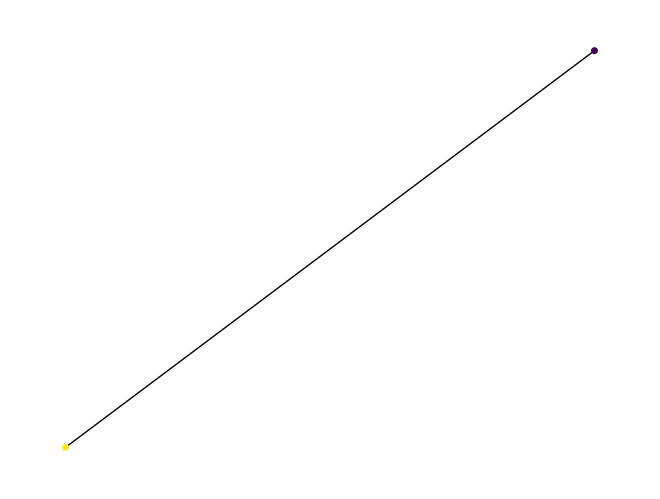

In [51]:
# Use the term 'champion' from League of Legends for the hyponym graph
champion_synset = wn.synset('champion.n.01')
graph = hyponym_graph(champion_synset)
graph_draw(graph)

# 10. Conclusion

#### Summary of Techniques Covered

In this notebook, we explored several foundational techniques in Natural Language Processing (NLP) using Python and the NLTK library. Here’s a brief summary of what was covered:

- **Data Collection and Preprocessing**: We began by collecting and cleaning text data from Wikipedia. We then tokenized the text to break it down into manageable units for analysis.
  
- **Lexical Analysis**: We measured lexical richness, analyzed word frequency distributions, and visualized the most common words in the dataset, providing insights into the text's vocabulary.

- **N-Grams and Frequency Distributions**: We computed bi-grams and tri-grams, helping us understand common word pairs and triples. Frequency filtering allowed us to focus on the most informative n-grams.

- **Collocations and Pointwise Mutual Information (PMI)**: We examined word collocations to identify pairs of words that commonly appear together. PMI scoring helped us assess the strength of these collocations.

- **Association Measures in NLTK**: We applied built-in association measures to identify meaningful bigrams, using various scoring methods to evaluate the strength of associations between words.

- **Lexicons and WordNet**: Finally, we explored different lexical resources, including stopwords, translation-based lexicons, and WordNet. WordNet allowed us to delve into synonyms, synsets, and semantic relationships, enhancing our understanding of word meanings and connections within the text.

#### Potential Next Steps in NLP Analysis

This notebook covers fundamental NLP techniques, but there are several avenues to extend this work further. Here are a few potential next steps:

- **Advanced Semantic Analysis**: Implementing topic modeling techniques like Latent Dirichlet Allocation (LDA) or latent semantic analysis (LSA) could help in identifying underlying topics within the text corpus.

- **Named Entity Recognition (NER)**: By incorporating NER techniques, we could extract entities such as people, places, and organizations, enriching our understanding of key elements in the text.

- **Sentiment Analysis**: Applying sentiment analysis would allow us to gauge the emotional tone of the text. This could be especially useful in analyzing subjective or opinion-based content.

- **Word Embeddings**: Moving beyond lexical analysis, we could explore word embeddings (e.g., Word2Vec, GloVe) to capture semantic similarities between words. This would enable more nuanced and context-sensitive analysis.

- **Deep Learning Models for NLP**: Leveraging pre-trained transformer models like BERT or GPT could significantly enhance the complexity of text analysis, enabling tasks like text classification, question answering, and summarization.

These advanced techniques can further deepen insights into the structure, meaning, and context of the text, making them valuable next steps for building on this foundational NLP work.